# Capítulo 5. Redes neuronales.
> Autor: Natalia Cely Callejas, Ronald Arturo Chavez.\
> Universidad Nacional de Colombia  
> Julio 3, 2025

## Introducción
Las redes neuronales son sistemas bioinspirados en el funcionamiento del cerebro humano, compuesto por neuronas artificiales distribuidas en tres capas principales: *Input*, *Hidden* y *Output*. Estos sistemas se entrenan basados en diferentes variables cuya influencia en el resultado se determina con pesos y sesgos, esto modifica los resultados entregados en función de su validación con los valores correctos y por medio de refuerzos/penalización a través de una base de datos extensa y representativa. Generalmente, son utilizadas con fines de clasificación, predicción, reconocimiento de voz y procesamiento de lenguaje.

## Ejemplo MEPX con Redes Neuronales
Considerando el ejercicio realizado anteriormente con MEPX, se tomaron los datos del mismo ejemplo, correspondientes a una probabilidad de prognóstico de diabetes, para lo que inicialmente fue necesario exportar los datos como .csv para introducirlo en el nuevo código:
Se observa que 19/20 predicciones fueron correctas, mayores de forma significativa a las obtenidas con MPEX inicialmente.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Cargar el dataset
data = pd.read_csv("Datos_Diabetes_Procesados.csv")

# Separar características (X) y etiquetas (y)
X = data.drop("target", axis=1)
y = data["target"]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Definir la red neuronal
model = Sequential([
    Dense(16, activation='relu', input_shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# 3. Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluar
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n📊 Precisión en datos de prueba: {accuracy:.2%}")


# Predecir
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Mostrar predicciones reales vs. predichas
num_muestras = 20  # Número de ejemplos a mostrar
print(f"\n{'#':<2}  Real  Predicho  Probabilidad  {'Correcto?':<10}")
print("-" * 50)
for i in range(num_muestras):
    real = y_test.iloc[i]
    pred = y_pred[i]
    prob = y_pred_prob[i][0]
    correcto = "✅" if real == pred else "❌"
    print(f"{i+1:<2}   {real:<5}   {pred:<8}   {prob:.2f}        {correcto}")


Epoch 1/50


c:\Users\ncely\OneDrive\Documentos\GitRobotica\Robotica\Project\IAandMiniRobots\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5342 - loss: 0.7521   
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6567 - loss: 0.6518 
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7104 - loss: 0.6284 
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7477 - loss: 0.5869
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7129 - loss: 0.5812 
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - loss: 0.6116 
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7459 - loss: 0.5297 
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7462 - loss: 0.5446 
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5512 
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7458 - loss: 0.5069 
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7418 - loss: 0.5071 
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7226 - l


## Clasificación de prendas de vestir por redes neuronales
Haciendo uso del data set Fashion del MNIST se elaboró, entrenó y probó una red neuronal capaz de clasificar una imagen en 10tips de prendas de vestir: 
- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot
Esto fue finalmente validado utilizando 5 imagenes aleatorias y brindado una confiabilidad promedio del 88%,

c:\Users\ncely\OneDrive\Documentos\GitRobotica\Robotica\Project\IAandMiniRobots\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7806 - loss: 0.6301
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8610 - loss: 0.3851
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8781 - loss: 0.3339
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8819 - loss: 0.3173
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8911 - loss: 0.2964
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8973 - loss: 0.2795
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9010 - loss: 0.2673
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9049 - loss: 0.2578
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9088 - loss: 0.2437
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9135 - loss: 0.2357
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.3286

Precisión en test: 88.73%
313/313 ━━━━━━━━

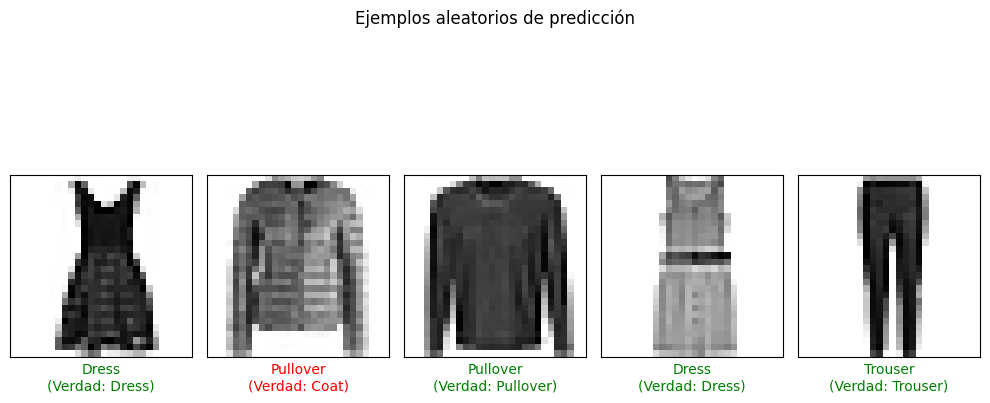

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#----------
# Cargar el dataset Fashion MNIST y dividirlo para su entrenamiento y validación
#----------

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#-------------
# Nombres de las clases/labels 0-9 según repositorio
#--------------

nombres_clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#-----------
# Normalizar los datos (0-1)
#-----------

x_train = x_train / 255.0
x_test = x_test / 255.0

#-----------
# Definir el modelo secuencial
#-----------

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),         # Capa de entrada
    tf.keras.layers.Dense(128, activation='relu'),         # Capa oculta
    tf.keras.layers.Dense(10, activation='softmax')        # Capa de salida (10 clases)
])

#-----------
# Compilación del modelo
#-----------

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#-----------
# Entrenar el modelo
#-----------

modelo.fit(x_train, y_train, epochs=10)

#-----------
# Evaluar en test
#-----------

test_loss, test_acc = modelo.evaluate(x_test, y_test)
print(f"\nPrecisión en test: {test_acc:.2%}")

#----------
# Predecir
#----------

predicciones = modelo.predict(x_test)

#----------
# Visualizar 5 predicciones de elementos aleatorios
#----------
indices = np.random.choice(len(x_test), size=5, replace=False)

plt.figure(figsize=(10,5))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    pred = np.argmax(predicciones[idx])
    color = "green" if pred == y_test[idx] else "red"
    plt.xlabel(f"{nombres_clases[pred]}\n(Verdad: {nombres_clases[y_test[idx]]})", color=color)
plt.suptitle("Ejemplos aleatorios de predicción")
plt.tight_layout()
plt.show()


## Data set Red neuronal Iris
Se consideró el data set Iris, uno de los ejemplos de Scikit-learn y se desarrolló una red neuronal basada en ese set de datos con 5 ejemplos.

In [11]:

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Capa oculta
    Dense(3, activation='softmax')  # Capa de salida
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nPrecisión del modelo en datos de prueba: {accuracy:.2f}")

weights_layer1, biases_layer1 = model.layers[0].get_weights()
weights_layer2, biases_layer2 = model.layers[1].get_weights()

# Usar un ejemplo con los pesos aprendidos
x_input = X_test[0]
print("\nEjemplo de entrada escalado:", x_input)

z1 = np.dot(x_input, weights_layer1) + biases_layer1
a1 = np.maximum(0, z1)  # ReLU
print("\nActivaciones capa 1 (ReLU):", a1)

z2 = np.dot(a1, weights_layer2) + biases_layer2

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

output_probs = softmax(z2)
predicted_class = np.argmax(output_probs)

print("\nPredicciones en lote de prueba:")
for i in range(5):
    x = X_test[i]
    y_true = y_test[i]
    z1 = np.dot(x, weights_layer1) + biases_layer1
    a1 = np.maximum(0, z1)
    z2 = np.dot(a1, weights_layer2) + biases_layer2
    probs = softmax(z2)
    pred = np.argmax(probs)
    print(f"Ejemplo {i+1}: Predicho = {pred}, Real = {y_true}, Probabilidades = {probs.round(3)}")


c:\Users\ncely\OneDrive\Documentos\GitRobotica\Robotica\Project\IAandMiniRobots\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8333 - loss: 0.4266

Precisión del modelo en datos de prueba: 0.83

Ejemplo de entrada escalado: [ 0.31099753 -0.59237301  0.53540856  0.00087755]

Activaciones capa 1 (ReLU): [0.         0.         0.         0.57977297 0.         0.32333899
 0.27255312 0.49679185 0.41079801 0.10766672]

Predicciones en lote de prueba:
Ejemplo 1: Predicho = 2, Real = 1, Probabilidades = [0.141 0.376 0.484]
Ejemplo 2: Predicho = 0, Real = 0, Probabilidades = [0.93  0.047 0.024]
Ejemplo 3: Predicho = 2, Real = 2, Probabilidades = [0.02  0.129 0.851]
Ejemplo 4: Predicho = 2, Real = 1, Probabilidades = [0.166 0.365 0.468]
Ejemplo 5: Predicho = 2, Real = 1, Probabilidades = [0.093 0.347 0.56 ]


## Aporte de LLMs.
 Para las redes neuronales de MEXP fue útil el uso de IA para optimiar la forma de mostrar resultados de manera iterativa y los elementos gráficos que hacerlo facilmente interpretable por el usuario, además de su uso apra la correcta visualización de los elementos sobre los que se validó el dataset de Moda del MNIST.
 En la red neuronal Iris recurrí al apoyo de una herramienta de lenguaje grande (LLM), ChatGPT, para resolver obstáculos técnicos específicos y agilizar el aprendizaje. También actuó como un asistente técnico complementario, facilitando el avance continuo del trabajo y promoviendo una comprensión más profunda del funcionamiento de las redes neuronales artificiales.

## Conclusiones. 
El desarrollo de una red neuronal artificial para la clasificación del conjunto de diferentes conjuntos de datos permitió comprender de manera integral tanto los fundamentos teóricos como la aplicación práctica del aprendizaje automático supervisado. A través del diseño del modelo, la selección de funciones de activación adecuadas, el entrenamiento con datos normalizados y la evaluación de su desempeño, fue posible evidenciar cómo una red neuronal transforma los datos de entrada en decisiones predictivas mediante el ajuste de pesos internos o entrenamiento debido a aprendizaje reforzado y validación.